<a href="https://colab.research.google.com/github/carlostomeh/viz/blob/main/Case_Neon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install --upgrade pandas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Definindo alguns parametros para os gráficos
sns.set_theme(style="whitegrid")

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}
plt.rcParams.update(params)


# Lendo as bases de dados
path = 'Case_Business_Analytics_v5.xlsx'
Tabela_Client        = pd.read_excel(path, sheet_name = 'Tabela_Client', na_values = ['NULL', None, 'Unknown'])
Tabela_CreditStatus  = pd.read_excel(path, sheet_name = 'Tabela_CreditStatus', na_values = 'NULL')
Tabela_InvoiceStatus = pd.read_excel(path, sheet_name = 'Tabela_InvoiceStatus', na_values = 'NULL')


Tabela_Client.head()

,ClientId,Gender,Platform,OSVersion,AddressState,Birthdate,CurrentStatus,RegisterDate,RegisterConclusionDate,RegisterApprovalDate,FirstTransactionDate,PresumedIncome
0,81.0,Male,iPhone+OS,9.3.2,SP,1991-04-24,Aprovado,2016-05-31,NaT,2016-06-06,2016-06-14,4161.75
1,159.0,Female,iPhone+OS,9.3.2,SP,1991-04-09,Aprovado,2016-07-05,NaT,2016-08-24,2016-11-18,4225.12
2,316.0,Male,Android,9.3.2,SP,1991-08-04,Aprovado,2016-07-15,NaT,2016-09-08,2019-08-29,14233.47
3,328.0,Male,iPhone+OS,10.2.1,SP,1988-03-13,Aprovado,2016-09-06,NaT,2016-09-08,2016-09-15,2100.00
4,380.0,Male,Android,5.0,RN,1987-08-31,Aprovado,2016-07-11,NaT,2016-09-12,2016-09-13,3316.71


In [ ]:
print("Quantidade de clientes na Tabela Client: ", Tabela_Client.shape[0])
print("Quantidade de clientes na Tabela Credit Status: ", Tabela_CreditStatus.shape[0])
print("Quantidade de faturas na Tabela Invoice: ", Tabela_InvoiceStatus.shape[0])

Quantidade de clientes na Tabela Client:  58005
Quantidade de clientes na Tabela Credit Status:  34763
Quantidade de faturas na Tabela Invoice:  114559


In [ ]:
Tabela_InvoiceStatus.head()

,Date,ClientId,FirstInvoiceDate,InvoiceId,InvoiceDueDate,OverdueDays,InvoiceStatus,InvoiceValue
0,2019-12-05,159,2019-05-05,1693046,2019-12-05,0,REGULAR,829.62
1,2019-06-05,159,2019-05-05,481036,2019-06-05,0,REGULAR,190.00
2,2019-08-05,159,2019-05-05,808989,2019-08-05,0,REGULAR,216.77
3,2019-10-05,159,2019-05-05,1001064,2019-10-05,0,REGULAR,165.80
4,2020-01-05,159,2019-05-05,1693047,2020-01-05,0,REGULAR,434.52


In [ ]:
Tabela_CreditStatus.head()

,ClientId,CreditStatus
0,698350,Ativo
1,817285,Ativo
2,962167,Ativo
3,1980380,Ativo
4,4059697,Reprovado


In [ ]:
#### Algumas informações iniciais da Tabelas Client

print("Porcentagem de valores nulos na tabela CLient:\n",Tabela_Client.isnull().sum()*100  /  len(Tabela_Client)) 

Porcentagem de valores nulos na tabela CLient:
 ClientId                  31.185243
Gender                     6.595983
Platform                   6.052926
OSVersion                 11.690372
AddressState               6.514956
Birthdate                  0.051720
CurrentStatus              0.000000
RegisterDate               0.000000
RegisterConclusionDate    24.046203
RegisterApprovalDate      31.185243
FirstTransactionDate      52.254116
PresumedIncome             0.000000
dtype: float64


*Detalhe*: 

As outras tabelas CreditStatus e Invoice Status não possuem valores nulos, condizente com a origem dessas tabelas que são geradas por sistemas internos, diferente dos dados cadastrais da tabela Client.

In [ ]:
Tabela_Client.dtypes

ClientId                         float64
Gender                            object
Platform                          object
OSVersion                         object
AddressState                      object
Birthdate                 datetime64[ns]
CurrentStatus                     object
RegisterDate              datetime64[ns]
RegisterConclusionDate    datetime64[ns]
RegisterApprovalDate      datetime64[ns]
FirstTransactionDate      datetime64[ns]
PresumedIncome                   float64
dtype: object

## Perguntas do Case



#### Etapa 1

O time de Cartão de Crédito necessita de visibilidade sobre a
performance do motor de aprovação do produto. A Tabela CreditStatus
possui o status atual dos clientes que fizeram o pedido do cartão de
crédito. Considere os seguintes possíveis status: Reprovado (teve pedido
do cartão de crédito recusado), Aprovado (teve pedido do cartão de
crédito aprovado), Ativo (teve pedido do cartão de crédito aprovado e
contratou o produto) e Bloqueado (contratou o cartão de crédito e está
inadimplente).



- *Questões:*

1.1: Qual a taxa de aprovação dos clientes? (i.e., qual o percentual de clientes aprovados)

1.2: Quais características dos clientes apresentam maior correlação com
a resposta de aprovação do motor de crédito?


In [ ]:
## Calculando a porcentagem de clientes aprovados

# Pela descrição os clientes aprovados são aqueles com os status: "Aprovado", "Ativo" e "Bloqueado"
# Facilitando, são todos aqueles que não foram reprovados

Tabela_CreditStatus.CreditStatus.value_counts(normalize='True')*100

Ativo        48.180537
Reprovado    44.938584
Bloqueado     6.296925
Aprovado      0.583954
Name: CreditStatus, dtype: float64

In [ ]:
print("A taxa de aprovação no motor de aprovação é de :" ,(1 - (Tabela_CreditStatus.CreditStatus.value_counts(normalize='True')['Reprovado']))*100, "%" )

A taxa de aprovação no motor de aprovação é de : 55.06141587319851 %


*Questão 2*

Para esta questão temos que unir as bases de Credit Status e Client.  

In [ ]:
# Unindo as duas bases usando left join com Credit Status a esquerda
Client_Aproval_full = pd.merge(Tabela_CreditStatus, Tabela_Client, how='left', on=['ClientId'])

In [ ]:
 # Criando a regra de Aprovação
 
 Client_Aproval_full['Aprovado?'] = 1
 Client_Aproval_full['Aprovado?'][Client_Aproval_full.CreditStatus == 'Reprovado'] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
# Tratamentos Inicias

# Corrigindo valores digitados fora do padrão de Sigla para estado
Client_Aproval_full.AddressState = Client_Aproval_full.AddressState.replace( {'Bahia': 'BA'          
                                                                                    ,'Piauí':'PI'
                                                                                    ,'Ceará':'CE'
                                                                                    ,'Pe':'PE'
                                                                                    ,'Sc':'SC'
                                                                                    ,'Se':'SE'
                                                                                    ,'bahia':'BA'
                                                                                    ,'ce':'CE'
                                                                                    ,'ms':'MS'
                                                                                    ,'pr':'PR'  } )


# Cria a variavel Age com base no ano de nascimento
Client_Aproval_full['Age'] = pd.to_datetime('today').year -  pd.DatetimeIndex(Client_Aproval_full['Birthdate']).year

#### Variaveis Categóricas

* Gender
* Platform
* OSVersion
* OSVersion_simplified
* AddressState

In [ ]:
def print_distribution(string_column):
  category_group = Client_Aproval_full.groupby([string_column]).\
                            apply(lambda x: pd.Series(dict( qtnde_clients      = (x['Aprovado?'].count())
                                                           ,contagem_aprovacao    = (x['Aprovado?'].sum())
                                                           ,porcentagem_aprovacao = (x['Aprovado?'].sum()/x['Aprovado?'].count()*100)
                                                          ))).reset_index()
  return category_group.sort_values(by='porcentagem_aprovacao', ascending=False);

In [ ]:
print_distribution('Gender')

,Gender,qtnde_clients,contagem_aprovacao,porcentagem_aprovacao
1,Male,17487.0,9818.0,56.144565
0,Female,16109.0,8737.0,54.236762


In [ ]:
print_distribution('Platform')

,Platform,qtnde_clients,contagem_aprovacao,porcentagem_aprovacao
1,iPhone+OS,6595.0,4019.0,60.940106
0,Android,28132.0,15121.0,53.750178


In [ ]:
print_distribution('OSVersion')

,OSVersion,qtnde_clients,contagem_aprovacao,porcentagem_aprovacao
63,4.4.3,3.0,3.0,100.0
3,1.0.8,2.0,2.0,100.0
74,7.1,2.0,2.0,100.0
79,8.1,1.0,1.0,100.0
84,9.2.1,3.0,3.0,100.0
...,...,...,...,...
83,9.2,1.0,0.0,0.0
85,9.3,1.0,0.0,0.0
86,9.3.1,2.0,0.0,0.0
49,12.4.4,6.0,0.0,0.0


*Observação*

Veja que como temos 92 categorias em versão do sistema operacional temos que agrupar algumas versões para poder verificar uma possível correlação. Vamos verificar agora OSVersion_simplified.

In [ ]:
# Cria uma coluna com a versão do sistema operacional simplificado - Busca somente a primeira parte da versão
list_string = []

for string_inicial in Client_Aproval_full['OSVersion'].values:
  if string_inicial != np.nan: string_temp = str(string_inicial).split(".")[0]
  else: string_temp = np.nan

  list_string.append(string_temp)

Client_Aproval_full['OSVersion_simplified'] = list_string

In [ ]:
print_distribution('OSVersion_simplified')

,OSVersion_simplified,qtnde_clients,contagem_aprovacao,porcentagem_aprovacao
0,1,37.0,29.0,78.378378
3,12,3843.0,2451.0,63.778298
1,10,461.0,286.0,62.039046
2,11,924.0,564.0,61.038961
9,8,8380.0,4668.0,55.704057
10,9,6138.0,3382.0,55.099381
8,7,4889.0,2606.0,53.303334
11,nan,3098.0,1636.0,52.808263
7,6,4393.0,2258.0,51.399954
5,4,376.0,192.0,51.063830


In [ ]:
print_distribution('AddressState')

,AddressState,qtnde_clients,contagem_aprovacao,porcentagem_aprovacao
17,PR,2120.0,1291.0,60.896226
22,RS,1374.0,815.0,59.315866
23,SC,1206.0,710.0,58.872305
1,AL,697.0,407.0,58.393113
7,ES,833.0,483.0,57.983193
6,DF,715.0,408.0,57.062937
16,PI,430.0,242.0,56.279070
18,RJ,3608.0,2030.0,56.263858
25,SP,8244.0,4607.0,55.883066
15,PE,1841.0,1027.0,55.784900


#### Variaveis Numéricas

Nestas variaveis a idéia é agrupar os valores em intervalos e verificar se os grupos discriminam a aprovação ou não. Mas antes vamos verificar a correlação de pearson como analise inicial. Utilizaremos as colunas:

* Age
* PresumedIncome

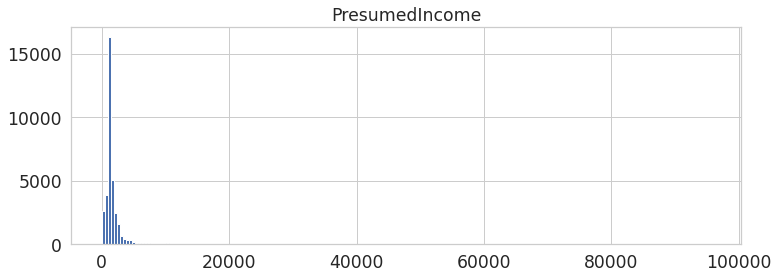

In [ ]:
Client_Aproval_full[ (Client_Aproval_full['PresumedIncome'] < 100000)].hist(column=['PresumedIncome'], figsize=(12,4), bins=200);

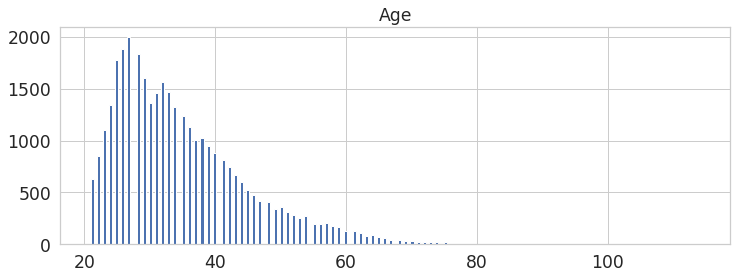

In [ ]:
Client_Aproval_full.hist(column=['Age'], figsize=(12,4), bins=200);

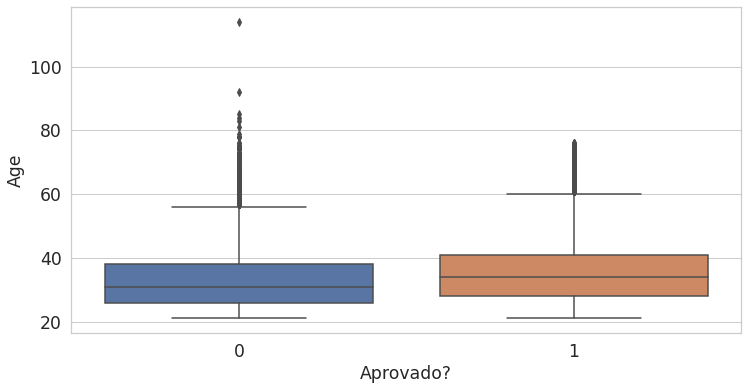

In [ ]:
fig, axes = plt.subplots(1,figsize=(12, 6))

sns.boxplot(y="Age", x="Aprovado?", data=Client_Aproval_full);

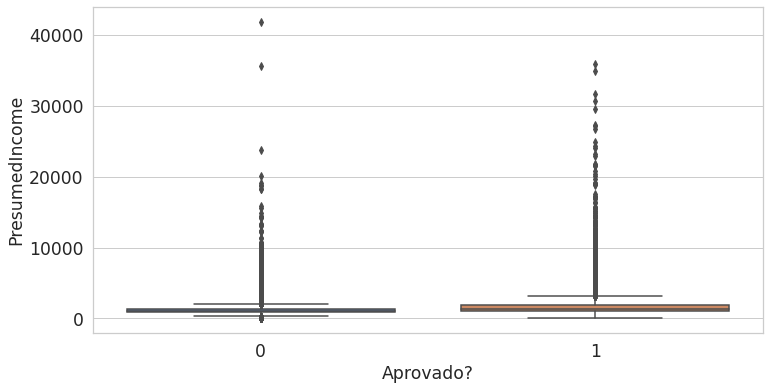

In [ ]:
fig, axes = plt.subplots(1,figsize=(12, 6))

sns.boxplot(y="PresumedIncome", x="Aprovado?", data=Client_Aproval_full[Client_Aproval_full['PresumedIncome'] < 50000]);

*Observação*

Aqui já identificamos uma série de valores que consideramos outliers na variavel PresumedIncome e alguns outros em Age. A diferença é que em Age os valores, ainda que alto (110 anos), é possível mesmo que improvavel.

In [ ]:
Client_Aproval_full[['Aprovado?', 'Age', 'PresumedIncome']].corr().sort_values(by=['Aprovado?'] ,ascending = False)[['Aprovado?']].style.background_gradient(cmap='Greens', axis =0)

,Aprovado?
Aprovado?,1.000000
Age,0.140355
PresumedIncome,0.048656


*Observação*

Veja que se considerarmos a correlação de pearson, não temos uma relação linear entre a aprovação e as variaveis numéricas. Vamos agora testar com os agrupamentos.


In [ ]:
bins = pd.IntervalIndex.from_tuples([(18, 25), (25, 35), (35, 45), (45, 60), (60, 200)])

#  labels = ['18-25 anos','25-35 anos','35-45 anos','45-60 anos','+60 anos']
Client_Aproval_full['Grouped_Age'] = pd.cut(x=Client_Aproval_full['Age'],bins=bins, duplicates='drop').astype(str)
Client_Aproval_full['Grouped_Age'] = Client_Aproval_full['Grouped_Age'].replace("(18, 25]", '18-25 anos').replace('(25, 35]', '25-35 anos').replace('(35, 45]', '35-45 anos').replace('(45, 60]', '45-60 anos').replace('(60, 200]', '+60 anos')

In [ ]:
print_distribution('Grouped_Age')

,Grouped_Age,qtnde_clients,contagem_aprovacao,porcentagem_aprovacao
0,+60 anos,816.0,559.0,68.504902
4,45-60 anos,4183.0,2677.0,63.997131
3,35-45 anos,8328.0,4963.0,59.594140
2,25-35 anos,15731.0,8806.0,55.978641
1,18-25 anos,5705.0,2136.0,37.440841


In [ ]:
bins = pd.IntervalIndex.from_tuples([(18, 25), (25, 35), (35, 45), (45, 60), (60, 200)])

#  labels = ['18-25 anos','25-35 anos','35-45 anos','45-60 anos','+60 anos']
Client_Aproval_full['Grouped_PresumedIncome'] = pd.qcut(x=Client_Aproval_full['PresumedIncome'],q=[0,.2,.4,.6,.8,1]
                                                        ,labels=["Baixíssimo","Baixo","Médio","Alto","Altíssimo"] ,duplicates='drop')


In [ ]:
pd.qcut(x=Client_Aproval_full['PresumedIncome'],q=[0,.2,.4,.6,.8,1] ,duplicates='drop')

0          (1363.66, 1905.21]
1           (1124.1, 1363.66]
2        (1905.21, 1098161.0]
3        (1905.21, 1098161.0]
4           (1124.1, 1363.66]
                 ...         
34758        (991.57, 1124.1]
34759    (1905.21, 1098161.0]
34760    (1905.21, 1098161.0]
34761       (1124.1, 1363.66]
34762        (991.57, 1124.1]
Name: PresumedIncome, Length: 34763, dtype: category
Categories (5, interval[float64, right]): [(-0.001, 991.57] < (991.57, 1124.1] < (1124.1, 1363.66] <
                                           (1363.66, 1905.21] < (1905.21, 1098161.0]]

In [ ]:
print_distribution('Grouped_PresumedIncome')

,Grouped_PresumedIncome,qtnde_clients,contagem_aprovacao,porcentagem_aprovacao
4,Altíssimo,6921.0,4958.0,71.637047
3,Alto,6459.0,4151.0,64.266914
2,Médio,7477.0,4256.0,56.921225
1,Baixo,6953.0,3783.0,54.408169
0,Baixíssimo,6953.0,1993.0,28.663886


#### Etapa 2

Assim como a taxa de aprovação e o volume de contratação, uma métrica muito importante para o time de Cartão de Crédito é a taxa de inadimplência dos clientes. Um dos indicadores mais importantes para a análise de inadimplência é o "Over 30 mob 3". Este indicador analisa o cliente, no vencimento de sua terceira fatura (mob 3) que possui 30 ou mais dias de atraso (over 30) no seu pagamento. Exemplo: Para todos clientes que tiveram a sua primeira fatura não nula em janeiro, calcular quantos deles estavam com 30 ou mais dias de atraso em março. A tabela InvoiceStatus traz os status de cada uma das faturas
dos clientes, além de suas respectivas safras.

- *Questões:*


2.1: Qual o Over 30 mob3 para a Neon em uma visão geral? Qual o Over 30 mob3
para cada uma das safras (mensais)?

2.2: Utilizando as informações fornecidas neste documento, avalie quais são as variáveis mais relevantes para a taxa de inadimplência do cartão de crédito Neon.

In [ ]:
# Cria uma coluna que identifica a ordem das faturas
diff_ano = pd.DatetimeIndex(Tabela_InvoiceStatus['InvoiceDueDate']).year  -  pd.DatetimeIndex(Tabela_InvoiceStatus['FirstInvoiceDate']).year
diff_mes = pd.DatetimeIndex(Tabela_InvoiceStatus['InvoiceDueDate']).month -  pd.DatetimeIndex(Tabela_InvoiceStatus['FirstInvoiceDate']).month
Tabela_InvoiceStatus['InvoiceNumber'] = (diff_ano * 12) + diff_mes + 1

# Cria uma coluna simplificada para Safra
Tabela_InvoiceStatus['Safra'] = pd.to_datetime(Tabela_InvoiceStatus['FirstInvoiceDate']).dt.to_period('M')

Tabela_InvoiceStatus.head()

,Date,ClientId,FirstInvoiceDate,InvoiceId,InvoiceDueDate,OverdueDays,InvoiceStatus,InvoiceValue,InvoiceNumber,Safra
0,2019-12-05,159,2019-05-05,1693046,2019-12-05,0,REGULAR,829.62,8,2019-05
1,2019-06-05,159,2019-05-05,481036,2019-06-05,0,REGULAR,190.00,2,2019-05
2,2019-08-05,159,2019-05-05,808989,2019-08-05,0,REGULAR,216.77,4,2019-05
3,2019-10-05,159,2019-05-05,1001064,2019-10-05,0,REGULAR,165.80,6,2019-05
4,2020-01-05,159,2019-05-05,1693047,2020-01-05,0,REGULAR,434.52,9,2019-05


*Detalhe*

Observe que existem 32 Clientes que possuem mais de 3 faturas, mas não tem o registro da terceira fatura na base de dados. Veja alguns exemplos abaixo:

In [ ]:
# Não possue a fatura de Junho-2019, que seria a terceira fatura
Tabela_InvoiceStatus[Tabela_InvoiceStatus['ClientId'] == 26074 ].sort_values(by=['InvoiceNumber'])

,Date,ClientId,FirstInvoiceDate,InvoiceId,InvoiceDueDate,OverdueDays,InvoiceStatus,InvoiceValue,InvoiceNumber,Safra
1284,2019-04-21,26074,2019-04-21,298587,2019-04-21,0,REGULAR,1527.96,1,2019-04
1282,2019-05-21,26074,2019-04-21,327233,2019-05-21,0,REGULAR,1626.61,2,2019-04
1288,2019-07-11,26074,2019-04-21,569306,2019-07-11,0,REGULAR,2037.12,4,2019-04
1286,2019-08-11,26074,2019-04-21,569308,2019-08-11,0,REGULAR,2622.47,5,2019-04
1283,2019-09-11,26074,2019-04-21,634675,2019-09-11,0,REGULAR,2238.36,6,2019-04
1281,2019-10-11,26074,2019-04-21,634676,2019-10-11,0,REGULAR,1671.72,7,2019-04
1287,2019-11-11,26074,2019-04-21,1169951,2019-11-11,0,REGULAR,2082.74,8,2019-04
1285,2019-12-11,26074,2019-04-21,1169952,2019-12-11,0,REGULAR,3582.64,9,2019-04


In [ ]:
# Não possue a fatura de Dezembro-2019, que seria a terceira fatura
Tabela_InvoiceStatus[Tabela_InvoiceStatus['ClientId'] == 862923 ]

,Date,ClientId,FirstInvoiceDate,InvoiceId,InvoiceDueDate,OverdueDays,InvoiceStatus,InvoiceValue,InvoiceNumber,Safra
25647,2020-01-05,862923,2019-10-11,1738040,2020-01-05,0,REGULAR,0.00,4,2019-10
25648,2019-10-11,862923,2019-10-11,1256057,2019-10-11,0,REGULAR,79.95,1,2019-10
25649,2019-11-11,862923,2019-10-11,1469979,2019-11-11,0,REGULAR,0.00,2,2019-10


Vamos considerar esses clientes como *ADIMPLENTES* para nossa conta do Overmob30, pois após uma verificação rapida nenhum deles possuia dias de atraso na segunda e quarta fatura.

O próximo passo é agrupar os clientes e descobrir a situação deles na terceira fatura.

In [ ]:
# Primeiro vamos agrupar todos os clientes e buscar algumas informações relavantes, como:
# Safra                 => Busca a safra de entrada do cliente, 
# atraso_3fatura        => busca o valor de dias de atraso no ato da terceira fatura
# qtd_faturas           => quantidade de faturas do cliente
# media_fatura_3fatura  => valor medio das faturas do cliente ate a terceira fatura

Invoice_Groupby = Tabela_InvoiceStatus.groupby(['ClientId']).apply(lambda x: pd.Series(dict(
                                                        qtd_faturas              = ((x.ClientId.count()))
                                                        ,media_fatura_3fatura    = ((x[x['InvoiceNumber'] <= 3 ].InvoiceValue.mean()))
                                                        ,Safra                   = (x.Safra.min())
                                                        ,atraso_1fatura          = (x[x['InvoiceNumber'] == 1 ].OverdueDays.max())
                                                        ,atraso_2fatura          = (x[x['InvoiceNumber'] == 2 ].OverdueDays.max())
                                                        ,atraso_3fatura          = (x[x['InvoiceNumber'] == 3 ].OverdueDays.max())
                                                        ))).reset_index() 
                                                        

In [ ]:
# Agora vamos filtrar por clientes com 3 ou mais faturas e que nao tenham quantidade de faturas nula
Invoice_Groupby = Invoice_Groupby[(Invoice_Groupby['qtd_faturas'].notna())]

# Vamos imputar zero nos 32 clientes com terceira fatura faltante
Invoice_Groupby['atraso_3fatura'].fillna(0, inplace=True)

# Por fim, vamos criar uma flag para os clientes que possuem 3 ou mais dias de atraso 
Invoice_Groupby['Inadimplente_3fatura'] = None

###################### São 3 regras possiveis para atraso:

##### Regra 1: qtd_faturas == 1 e possui mais de um dia de atraso 
Invoice_Groupby['Inadimplente_3fatura'][(Invoice_Groupby['qtd_faturas']==1) & (Invoice_Groupby['atraso_1fatura']>0)] = 1

##### Regra 2: qtd_faturas == 2 e possui mais de um dia de atraso 
Invoice_Groupby['Inadimplente_3fatura'][(Invoice_Groupby['qtd_faturas']==2) & (Invoice_Groupby['atraso_2fatura']>0)] = 1

##### Regra 3 mes : qtd_faturas > 3 e 30 ou mais dias de atraso 
# Atribui valor 1 para os clientes que tiveram 30 ou mais dias de atraso na terceira fatura
Invoice_Groupby['Inadimplente_3fatura'][Invoice_Groupby['atraso_3fatura'] >= 30 ] = 1

#################### Agora vamos completar os valores nulos com Adimplente, ou seja, 0
Invoice_Groupby['Inadimplente_3fatura'].fillna(0, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
Invoice_Groupby.isnull().sum()

ClientId                   0
qtd_faturas                0
media_fatura_3fatura       0
Safra                      0
atraso_1fatura             0
atraso_2fatura          2168
atraso_3fatura             0
Inadimplente_3fatura       0
dtype: int64

In [ ]:
Invoice_Groupby.sort_values(by='atraso_3fatura', ascending=False).head()

,ClientId,qtd_faturas,media_fatura_3fatura,Safra,atraso_1fatura,atraso_2fatura,atraso_3fatura,Inadimplente_3fatura
1272,260257,3,1036.913333,2019-06,0,40.0,71.0,1
5426,1141713,3,1103.426667,2019-05,0,41.0,71.0,1
13575,1984322,3,769.556667,2019-07,0,31.0,62.0,1
10890,1723244,3,765.646667,2019-07,0,31.0,62.0,1
3810,918216,3,298.423333,2019-07,0,31.0,62.0,1


In [ ]:
# Por fim, vamos calcular o Over 30 mob 3
print("O indicador Over 30 mob 3 é de:" ,round(Invoice_Groupby.Inadimplente_3fatura.mean() * 100, 2), "%" )

O indicador Over 30 mob 3 é de: 17.2 %


##### Segunda questão:

Agora a ideia é trazer dados cadastrais para a base e tentar descobrir quais variaveis mais discrimnam os clientes quanto ao "Over 30 mob 3".

In [ ]:
# Vamos unir as duas tabelas com os dados cadastrias
dados_cadastrais = ['ClientId', 'Gender', 'Platform', 'OSVersion', 'AddressState', 'Birthdate', 'FirstTransactionDate', 'PresumedIncome']
Invoice_Groupby = pd.merge(Invoice_Groupby,Tabela_Client[dados_cadastrais], how = 'left', on=['ClientId'] )

In [ ]:
# Novamente tratamentos intermediarios:
# Tratamentos Inicias

################################## Corrigindo valores digitados errado

# Corrigindo valores digitados fora do padrão de Sigla para estado
Invoice_Groupby.AddressState = Invoice_Groupby.AddressState.replace( {'Bahia': 'BA'       
                                                                                    ,'Piauí':'PI'
                                                                                    ,'Ceará':'CE'
                                                                                    ,'Pe':'PE'
                                                                                    ,'Sc':'SC'
                                                                                    ,'Se':'SE'
                                                                                    ,'bahia':'BA'
                                                                                    ,'ce':'CE'
                                                                                    ,'ms':'MS'
                                                                                    ,'pr':'PR'  } )

################################## Criando a coluna Age

# Cria a variavel Age com base no ano de nascimento
Invoice_Groupby['Age'] = pd.to_datetime('today').year -  pd.DatetimeIndex(Invoice_Groupby['Birthdate']).year
bins = pd.IntervalIndex.from_tuples([(18, 25), (25, 35), (35, 45), (45, 60), (60, 200)])


################################## Criando categorias (faixas) para as variaveis numericas
#  Novamente agrupa as idades
Invoice_Groupby['Grouped_Age'] = pd.cut(x=Invoice_Groupby['Age'],bins=bins, duplicates='drop').astype(str)
Invoice_Groupby['Grouped_Age'] = Invoice_Groupby['Grouped_Age'].replace("(18, 25]", '18-25 anos').replace('(25, 35]', '25-35 anos').replace('(35, 45]', '35-45 anos').replace('(45, 60]', '45-60 anos').replace('(60, 200]', '+60 anos')

bins = pd.IntervalIndex.from_tuples([(18, 25), (25, 35), (35, 45), (45, 60), (60, 200)])

#  labels = ['18-25 anos','25-35 anos','35-45 anos','45-60 anos','+60 anos']
Invoice_Groupby['Grouped_PresumedIncome'] = pd.qcut(x=Invoice_Groupby['PresumedIncome'],q=[0,.2,.4,.6,.8,1]
                                                        ,labels=["Baixíssimo","Baixo","Médio","Alto","Altíssimo"] ,duplicates='drop')



################################## Criando versao simplificada da versao
# Cria uma coluna com a versão do sistema operacional simplificado - Busca somente a primeira parte da versão
list_string = []

for string_inicial in Invoice_Groupby['OSVersion'].values:
  if string_inicial != np.nan: string_temp = str(string_inicial).split(".")[0]
  else: string_temp = np.nan

  list_string.append(string_temp)

Invoice_Groupby['OSVersion_simplified'] = list_string

In [ ]:
# Cria uma funcao que categoriza a porcentagem de OVER30MOB3 para grupos:

def print_distribution_Over30mob3(string_column):
  category_group = Invoice_Groupby.groupby([string_column]).\
                            apply(lambda x: pd.Series(dict( qtnde_clients         = (x['Inadimplente_3fatura'].count())
                                                           ,contagem_inadimplente = (x['Inadimplente_3fatura'].sum())
                                                           ,Over30mob3            = (x['Inadimplente_3fatura'].sum()/x['Inadimplente_3fatura'].count()*100)
                                                          ))).reset_index()
  return category_group.sort_values(by='Over30mob3', ascending=False);

In [ ]:
print_distribution_Over30mob3('Gender')

,Gender,qtnde_clients,contagem_inadimplente,Over30mob3
1,Male,11474.0,2012.0,17.535297
0,Female,10010.0,1718.0,17.162837


In [ ]:
print_distribution_Over30mob3('Platform')

,Platform,qtnde_clients,contagem_inadimplente,Over30mob3
0,Android,17636.0,3189.0,18.082332
1,iPhone+OS,4480.0,615.0,13.727679


In [ ]:
print_distribution_Over30mob3('OSVersion_simplified')

,OSVersion_simplified,qtnde_clients,contagem_inadimplente,Over30mob3
6,5,895.0,224.0,25.027933
5,4,253.0,55.0,21.739130
7,6,2805.0,604.0,21.532977
8,7,3164.0,640.0,20.227560
11,nan,1999.0,386.0,19.309655
2,11,679.0,125.0,18.409426
1,10,321.0,56.0,17.445483
9,8,5415.0,941.0,17.377655
3,12,2765.0,391.0,14.141049
10,9,3437.0,375.0,10.910678


In [ ]:
print_distribution_Over30mob3('AddressState')

,AddressState,qtnde_clients,contagem_inadimplente,Over30mob3
16,PI,296.0,67.0,22.635135
9,MA,259.0,56.0,21.621622
11,MS,164.0,32.0,19.512195
10,MG,2400.0,464.0,19.333333
18,RJ,2454.0,469.0,19.111654
14,PB,490.0,93.0,18.979592
19,RN,483.0,91.0,18.840580
8,GO,789.0,148.0,18.757921
12,MT,213.0,39.0,18.309859
13,PA,337.0,61.0,18.100890


In [ ]:
print_distribution_Over30mob3('Grouped_Age')

,Grouped_Age,qtnde_clients,contagem_inadimplente,Over30mob3
1,18-25 anos,2468.0,487.0,19.732577
2,25-35 anos,10204.0,1775.0,17.395139
0,+60 anos,629.0,108.0,17.170111
3,35-45 anos,5756.0,967.0,16.799861
4,45-60 anos,3059.0,467.0,15.266427


In [ ]:
print_distribution_Over30mob3('Grouped_PresumedIncome')

,Grouped_PresumedIncome,qtnde_clients,contagem_inadimplente,Over30mob3
0,Baixíssimo,4425.0,1359.0,30.711864
1,Baixo,4439.0,882.0,19.869340
2,Médio,4406.0,863.0,19.586927
3,Alto,4424.0,431.0,9.742315
4,Altíssimo,4422.0,269.0,6.083220


In [ ]:
# Por fim, a Safra
print_distribution_Over30mob3('Safra').reset_index(drop=True)

,Safra,qtnde_clients,contagem_inadimplente,Over30mob3
0,2019-05,2802.0,1252.0,44.682370
1,2019-06,2778.0,1216.0,43.772498
2,2019-04,1405.0,154.0,10.960854
3,2019-02,1110.0,120.0,10.810811
4,2019-10,2104.0,218.0,10.361217
5,2019-07,1578.0,162.0,10.266160
6,2019-09,2015.0,205.0,10.173697
7,2019-08,1606.0,150.0,9.339975
8,2019-03,992.0,85.0,8.568548
9,2019-11,2253.0,173.0,7.678651


### Etapa 3

O time de Cartão de Crédito levantou a preocupação com um aparente aumento da inadimplência da Neon no segundo semestre de 2019. A preocupação é de que os clientes das safras a partir de julho/2019 possuem uma tendência maior à inadimplência.

- *Questões:*

3.1: A percepção do time de Cartão de Crédito está correta? Por qual
motivo o time de Cartão de Crédito pode ter chego a esta percepção?

3.2: Quais são possíveis causas do aumento da inadimplência observada
em meses específicos?


In [ ]:
# Imputa valores identificados como "vazio" para genero
Invoice_Groupby.Gender.fillna('vazio', inplace=True)

safra_grouped = Invoice_Groupby.groupby(['Safra']).apply(lambda x: pd.Series(dict( qtnde_clients         = (x['Inadimplente_3fatura'].count())
                                                           ,contagem_inadimplente = (x['Inadimplente_3fatura'].sum())
                                                           ,Over30mob3            = (x['Inadimplente_3fatura'].sum()*100 / x['Inadimplente_3fatura'].count())


                                                           ,pctg_age_18_25        = (x['ClientId'][x['Grouped_Age']=='18-25 anos' ].count() *100  / x['Inadimplente_3fatura'].count() )
                                                           ,pctg_age_25_35        = (x['ClientId'][x['Grouped_Age']=='25-35 anos' ].count() *100  / x['Inadimplente_3fatura'].count())
                                                           ,pctg_age_35_45        = (x['ClientId'][x['Grouped_Age']=='35-45 anos' ].count() *100  / x['Inadimplente_3fatura'].count())
                                                           ,pctg_age_45_60        = (x['ClientId'][x['Grouped_Age']=='45-60 anos' ].count() *100  / x['Inadimplente_3fatura'].count())
                                                           ,pctg_age_60mais       = (x['ClientId'][x['Grouped_Age']=='+60 anos' ].count() *100    / x['Inadimplente_3fatura'].count())

                                                           ,pctg_income_baixissimo= (x['ClientId'][x['Grouped_PresumedIncome']=='Baixo' ].count() *100  / x['Inadimplente_3fatura'].count())
                                                           ,pctg_income_baixo     = (x['ClientId'][x['Grouped_PresumedIncome']=='Baixíssimo' ].count() *100  / x['Inadimplente_3fatura'].count())
                                                           ,pctg_income_medio     = (x['ClientId'][x['Grouped_PresumedIncome']=='Médio' ].count() *100  / x['Inadimplente_3fatura'].count())
                                                           ,pctg_income_alto      = (x['ClientId'][x['Grouped_PresumedIncome']=='Alto' ].count() *100  / x['Inadimplente_3fatura'].count())
                                                           ,pctg_income_altissimo = (x['ClientId'][x['Grouped_PresumedIncome']=='Altíssimo' ].count() *100  / x['Inadimplente_3fatura'].count())

                                                           ,pctg_male     = (x['ClientId'][x['Gender']=='Male' ].count()   *100  / x['Inadimplente_3fatura'].count())
                                                           ,pctg_female   = (x['ClientId'][x['Gender']=='Female' ].count() *100  / x['Inadimplente_3fatura'].count())
                                                           ,pctg_vazio    = (x['ClientId'][x['Gender']=='vazio' ].count()     *100  / x['Inadimplente_3fatura'].count())

                                                          ))).reset_index()

In [ ]:
safra_grouped

,Safra,qtnde_clients,contagem_inadimplente,Over30mob3,pctg_age_18_25,pctg_age_25_35,pctg_age_35_45,pctg_age_45_60,pctg_age_60mais,pctg_income_baixissimo,pctg_income_baixo,pctg_income_medio,pctg_income_alto,pctg_income_altissimo,pctg_male,pctg_female,pctg_vazio
0,2019-01,857.0,39.0,4.550758,5.484247,48.191365,29.871645,14.585764,1.866978,21.003501,4.084014,17.969662,25.554259,31.388565,61.726954,37.222870,1.050175
1,2019-02,1110.0,120.0,10.810811,5.765766,48.738739,28.468468,14.234234,2.792793,17.207207,7.837838,20.900901,23.963964,30.090090,59.279279,39.369369,1.351351
2,2019-03,992.0,85.0,8.568548,6.149194,47.580645,28.125000,14.919355,3.225806,17.237903,10.987903,18.750000,27.721774,25.302419,57.258065,40.927419,1.814516
3,2019-04,1405.0,154.0,10.960854,7.117438,46.548043,28.113879,15.444840,2.775801,14.519573,21.423488,17.366548,22.633452,24.056940,55.444840,42.206406,2.348754
4,2019-05,2802.0,1252.0,44.682370,10.456817,50.000000,25.267666,11.705924,2.569593,19.557459,35.403283,19.271949,13.418986,12.348323,52.676660,45.217702,2.105639
5,2019-06,2778.0,1216.0,43.772498,10.727142,46.904248,25.017999,14.434845,2.915767,20.482361,34.089273,19.294456,12.922966,13.210943,53.671706,44.636429,1.691865
6,2019-07,1578.0,162.0,10.266160,9.569075,44.296578,28.707224,14.448669,2.978454,15.019011,26.489227,15.145754,21.229404,22.116603,52.027883,46.387833,1.584284
7,2019-08,1606.0,150.0,9.339975,8.156912,44.645081,28.518057,15.068493,3.611457,17.185554,21.980075,17.932752,20.049813,22.851806,51.930262,45.516812,2.552927
8,2019-09,2015.0,205.0,10.173697,10.272953,45.905707,26.699752,14.540943,2.580645,19.106700,17.071960,19.851117,21.290323,22.679901,52.109181,44.764268,3.126551
9,2019-10,2104.0,218.0,10.361217,18.393536,42.395437,25.142586,11.834601,2.233840,23.098859,13.212928,23.859316,21.007605,18.821293,50.522814,45.960076,3.517110


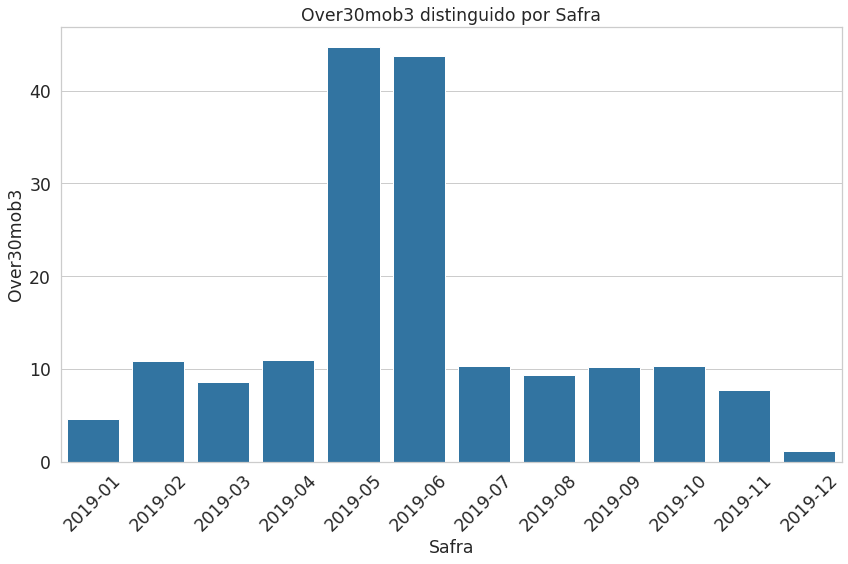

In [ ]:
fig, axes = plt.subplots(1, figsize=(14, 8))

sns.barplot(x="Safra", y="Over30mob3", data=safra_grouped,  color = 'tab:blue')

plt.title('Over30mob3 distinguido por Safra')
plt.xticks(rotation=45);


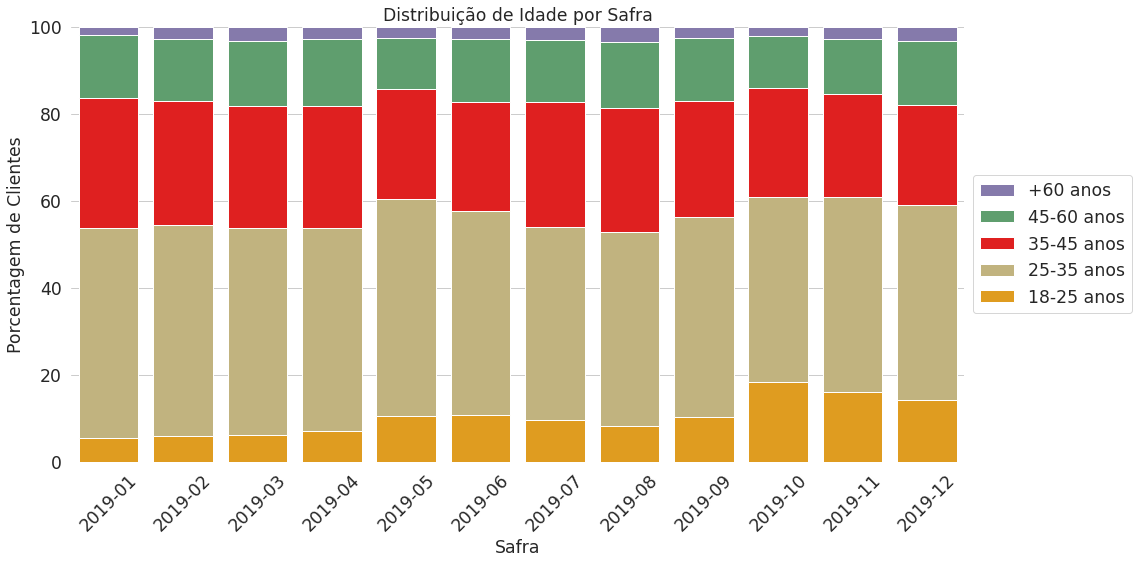

In [ ]:
temp = safra_grouped[['Safra', 'Over30mob3', 'pctg_age_18_25', 'pctg_age_25_35', 'pctg_age_35_45', 'pctg_age_45_60','pctg_age_60mais']].copy()

temp['pctg_age_25_35']  = temp['pctg_age_18_25'] + temp['pctg_age_25_35']
temp['pctg_age_35_45']  = temp['pctg_age_25_35'] + temp['pctg_age_35_45']
temp['pctg_age_45_60']  = temp['pctg_age_35_45'] + temp['pctg_age_45_60']
temp['pctg_age_60mais'] = temp['pctg_age_45_60'] + temp['pctg_age_60mais']

f, ax = plt.subplots(1, figsize=(16, 8))

sns.barplot(x="Safra", y="pctg_age_60mais", data=temp,  color = 'm',  label='+60 anos' )
sns.barplot(x="Safra", y="pctg_age_45_60", data=temp,  color = 'g',  label='45-60 anos' )
sns.barplot(x="Safra", y="pctg_age_35_45", data=temp,  color = 'red',  label='35-45 anos' )
sns.barplot(x="Safra", y="pctg_age_25_35", data=temp,  color = 'y',  label='25-35 anos' )
sns.barplot(x="Safra", y="pctg_age_18_25", data=temp,  color = 'orange',  label='18-25 anos' )


ax.legend(ncol=1, frameon=True, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Distribuição de Idade por Safra')
ax.set(ylim=(0, 100), ylabel="Porcentagem de Clientes", xlabel="Safra")
plt.xticks(rotation=45);

sns.despine(left=True, bottom=True)

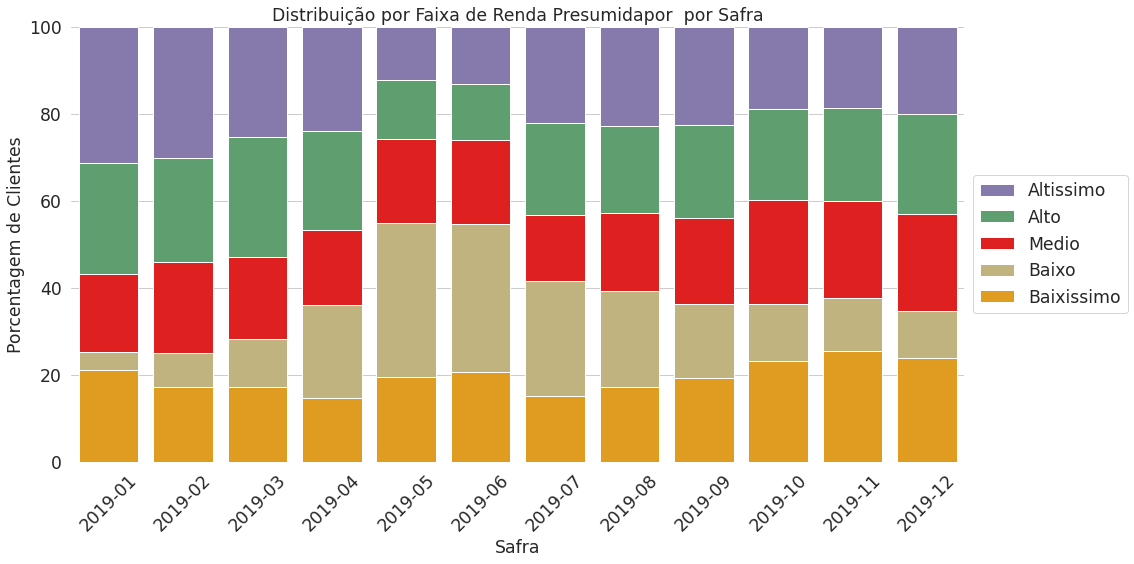

In [ ]:
temp = safra_grouped[['Safra', 'Over30mob3', 'pctg_income_baixissimo', 'pctg_income_baixo',  'pctg_income_medio', 'pctg_income_alto', 'pctg_income_altissimo']].copy()

temp['pctg_income_baixo']     = temp['pctg_income_baixissimo'] + temp['pctg_income_baixo']
temp['pctg_income_medio']     = temp['pctg_income_baixo'] + temp['pctg_income_medio']
temp['pctg_income_alto']      = temp['pctg_income_medio'] + temp['pctg_income_alto']
temp['pctg_income_altissimo'] = temp['pctg_income_alto'] + temp['pctg_income_altissimo']

f, ax = plt.subplots(1, figsize=(16, 8))

sns.barplot(x="Safra", y="pctg_income_altissimo", data=temp,  color = 'm',  label='Altissimo' )
sns.barplot(x="Safra", y="pctg_income_alto", data=temp,  color = 'g',  label='Alto' )
sns.barplot(x="Safra", y="pctg_income_medio", data=temp,  color = 'red',  label='Medio' )
sns.barplot(x="Safra", y="pctg_income_baixo", data=temp,  color = 'y',  label='Baixo' )
sns.barplot(x="Safra", y="pctg_income_baixissimo", data=temp,  color = 'orange',  label='Baixissimo' )


# Add a legend and informative axis label
ax.legend(ncol=1, frameon=True, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Distribuição por Faixa de Renda Presumidapor  por Safra')
ax.set(ylim=(0, 100), ylabel="Porcentagem de Clientes", xlabel="Safra")
plt.xticks(rotation=45);

sns.despine(left=True, bottom=True)



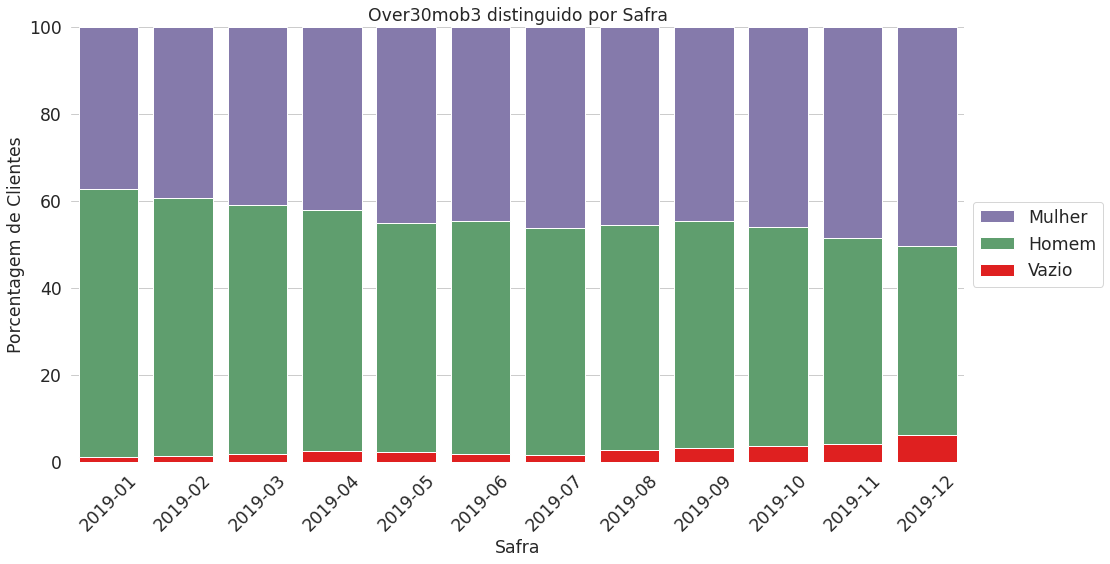

In [ ]:
temp = safra_grouped[['Safra', 'pctg_male', 'pctg_female', 'pctg_vazio']].copy()

temp['pctg_male']             = temp['pctg_vazio'] + temp['pctg_male']
temp['pctg_female'] = temp['pctg_male'] + temp['pctg_female']

f, ax = plt.subplots(1, figsize=(16, 8))

sns.barplot(x="Safra", y="pctg_female", data=temp,  color = 'm',  label='Mulher' )
sns.barplot(x="Safra", y="pctg_male", data=temp,  color = 'g',  label='Homem' )
sns.barplot(x="Safra", y="pctg_vazio", data=temp,  color = 'red',  label='Vazio' )


# Add a legend and informative axis label
ax.legend(ncol=1, frameon=True, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Over30mob3 distinguido por Safra')
ax.set(ylim=(0, 100), ylabel="Porcentagem de Clientes", xlabel="Safra")
plt.xticks(rotation=45);

sns.despine(left=True, bottom=True)